In [44]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
import copy
sys.path.append('../')
from vae_functions import *

images (310080, 2, 32, 32)
lacina (310080, 32, 32)


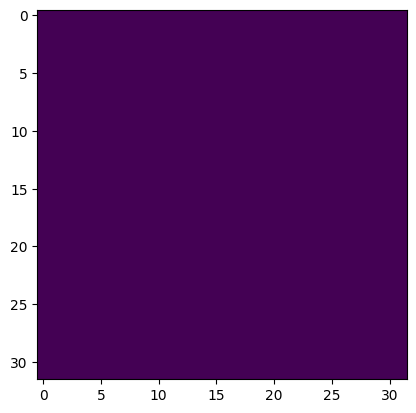

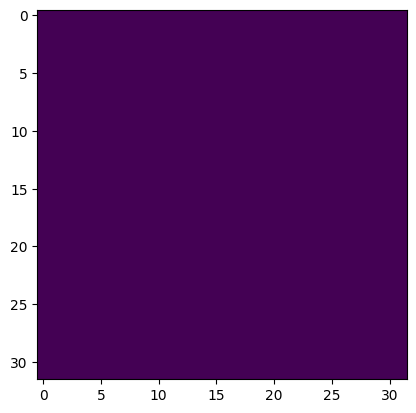

lacina (103886, 32, 32) --no spaces
lacina (103886, 32, 32, 1) --good shape


In [4]:
cluster_hiragana = np.load("cluster_hiragana_35.npy")
cluster_latin = np.load("cluster_latin_37.npy")
latin_datasets, hiragana_datasets = read_dataset_no_spaces(PATH)

latin_datasets = latin_datasets[:len(cluster_latin)]
hiragana_datasets = hiragana_datasets[:len(cluster_hiragana)]


In [73]:
def remap_to_lower_class(cluster_latin: np.ndarray, cluster_hiragana: np.ndarray) -> np.ndarray:
    latin = copy.deepcopy(cluster_latin)
    hiragana = copy.deepcopy(cluster_hiragana)
    min_number = np.min([np.max(latin), np.max(hiragana)])
    max_number = np.max([np.max(latin), np.max(hiragana)])
    print(f"min_number: {min_number}, max_number: {max_number}")
    for i in range(min_number + 1, max_number + 1):
        if i <= np.max(latin):
            print(f"latin: {i}")
            latin[latin == i] = min_number
        if i <= np.max(hiragana):
            print(f"hiragana: {i}")
            hiragana[hiragana == i] = min_number
    return latin[0], hiragana[0]

def create_class_map(datasets: np.ndarray, labels: np.ndarray) -> dict:
    vals, counts = np.unique(labels, return_counts=True)
    print(f"vals: {vals}")
    map_dict = {}
    for i, id in enumerate(vals):
        map_dict[id] = datasets[random.choice(np.argwhere(labels == id))].reshape(32,32)
    return map_dict

# def generate_decode_list(map_dict_latin: np.ndarray, map_dict_hiragana: np.ndarray) -> list:


In [74]:
cluster_latin_lower, cluster_hiragana_lower = remap_to_lower_class(cluster_latin[np.newaxis], cluster_hiragana[np.newaxis])
latin_lower = np.array(np.unique(cluster_latin_lower, return_counts=True)).T
hiragana_lower = np.array(np.unique(cluster_hiragana_lower, return_counts=True)).T

min_number: 34, max_number: 36
latin: 35
latin: 36


In [75]:
map_latin = create_class_map(latin_datasets, cluster_latin_lower)
map_hiragana = create_class_map(hiragana_datasets, cluster_hiragana_lower)


vals: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
vals: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


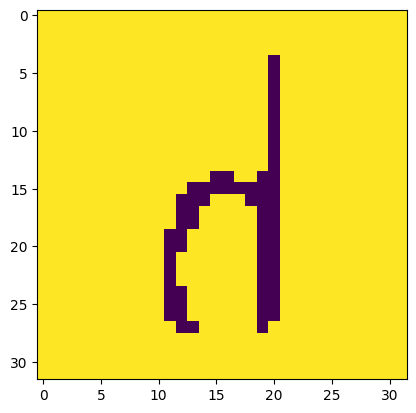

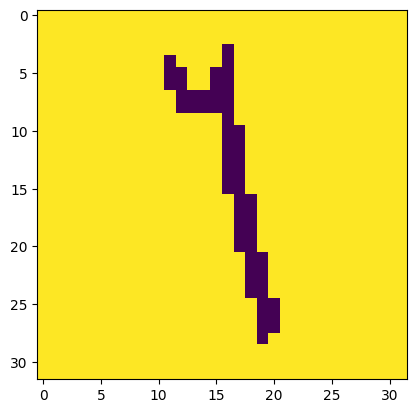

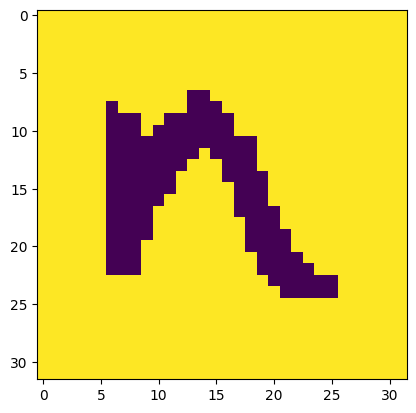

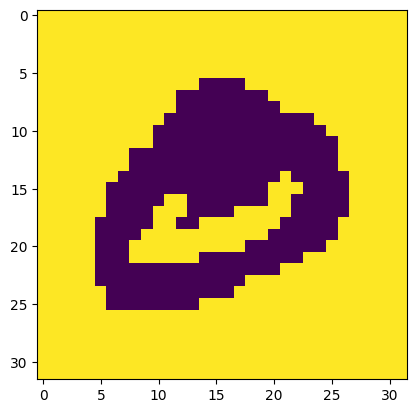

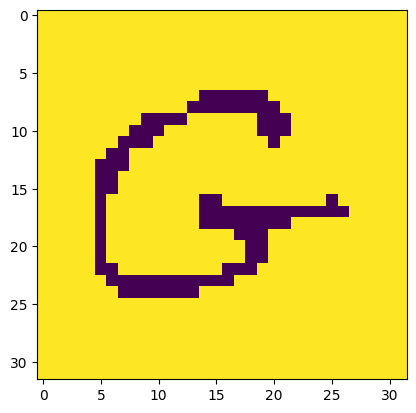

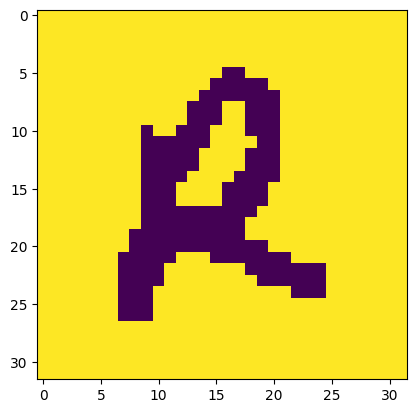

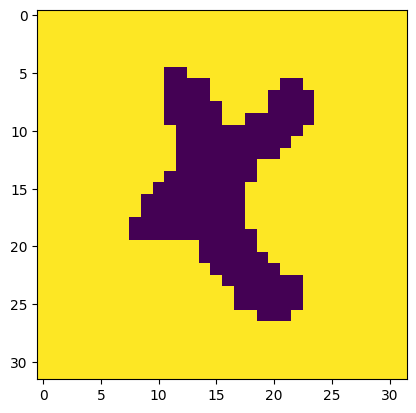

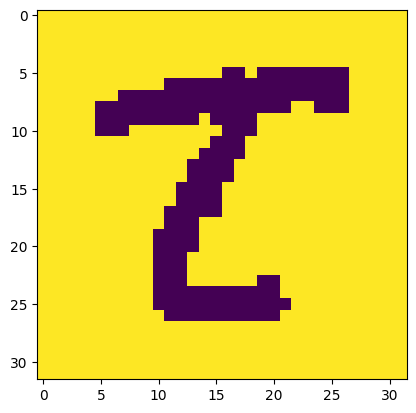

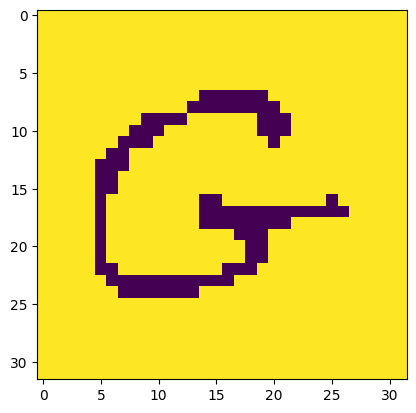

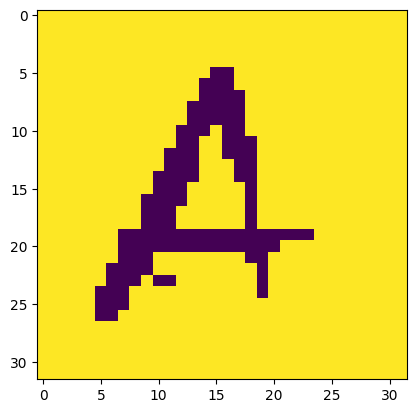

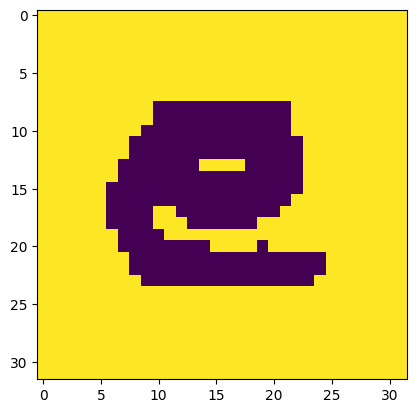

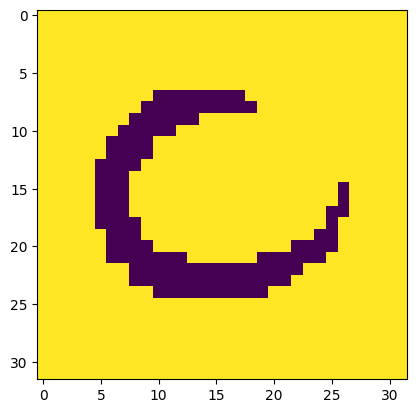

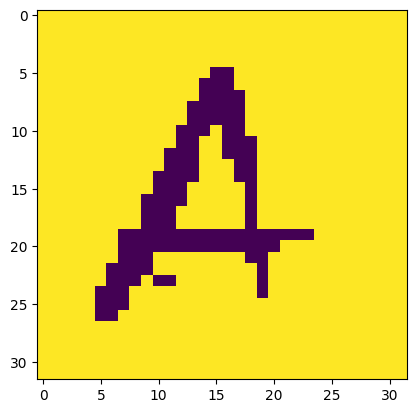

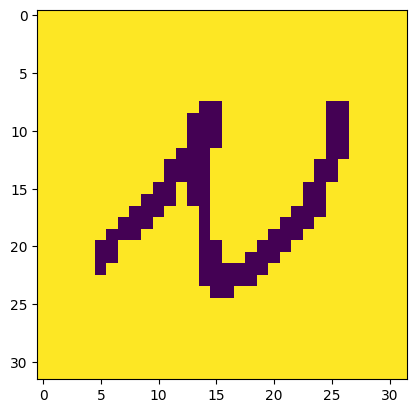

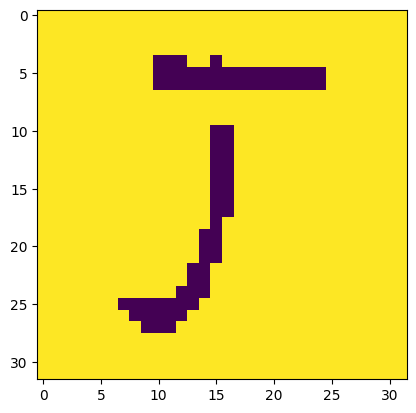

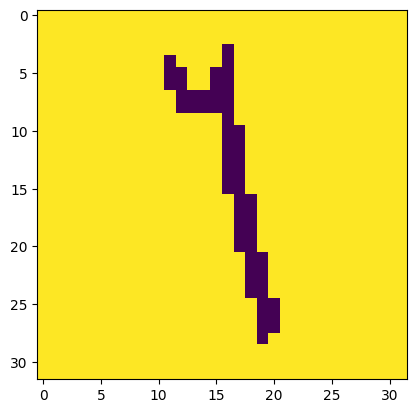

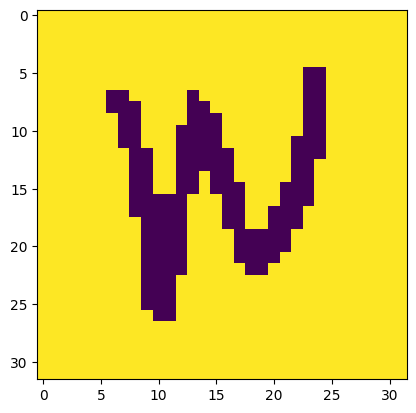

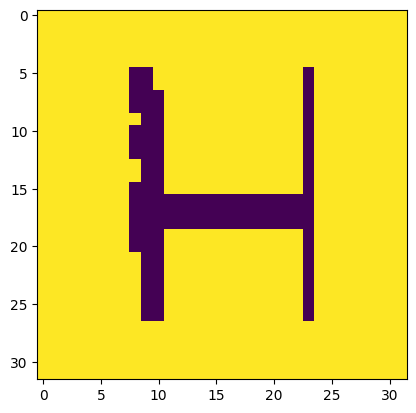

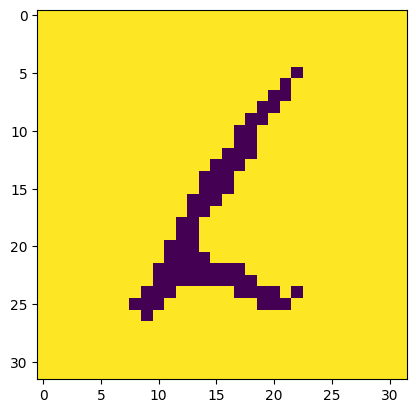

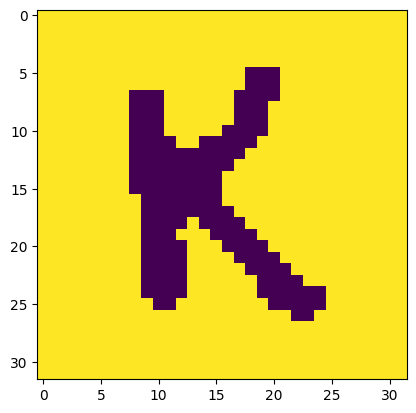

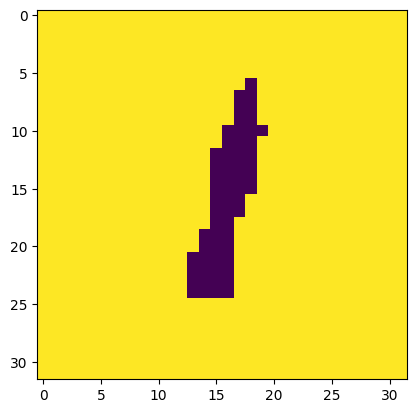

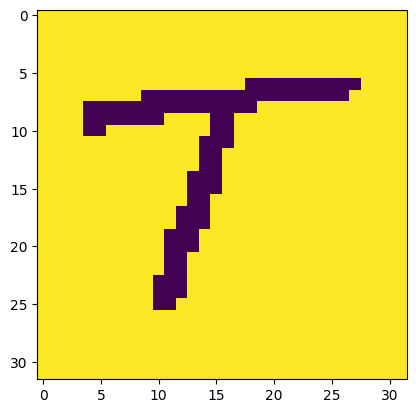

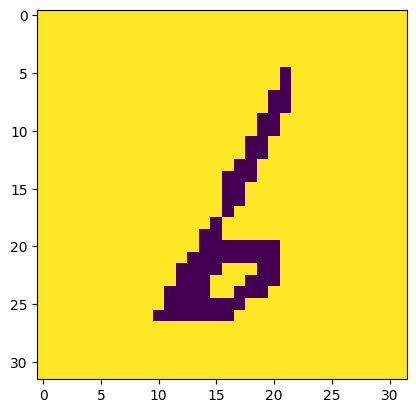

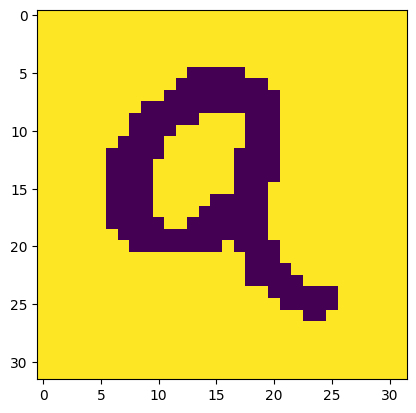

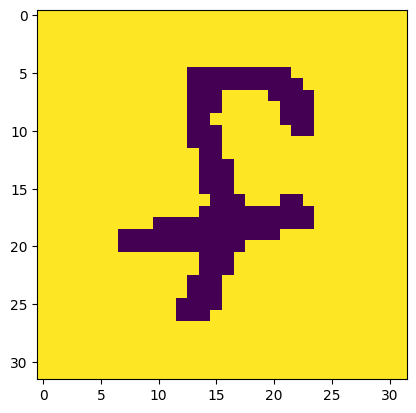

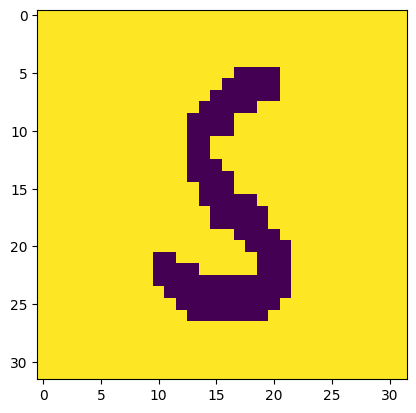

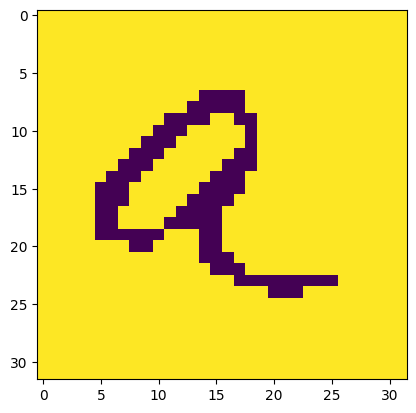

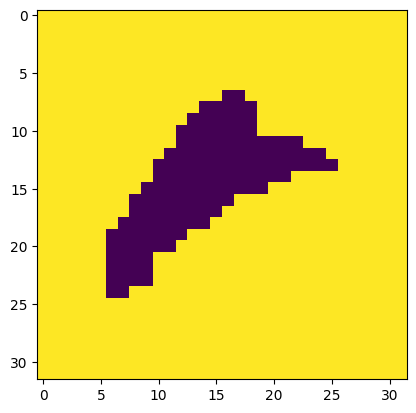

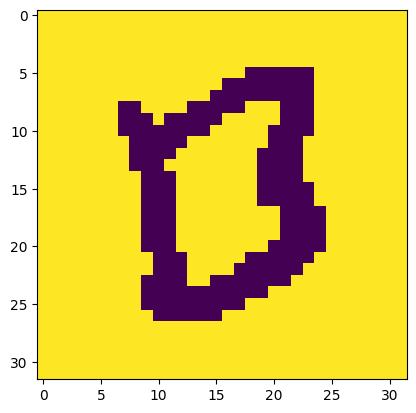

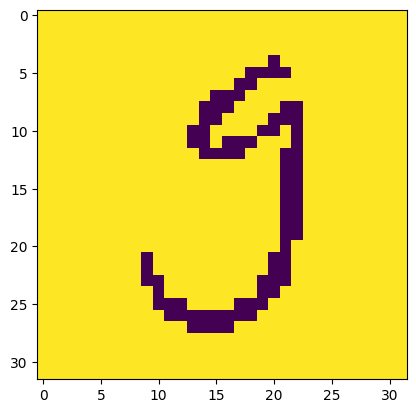

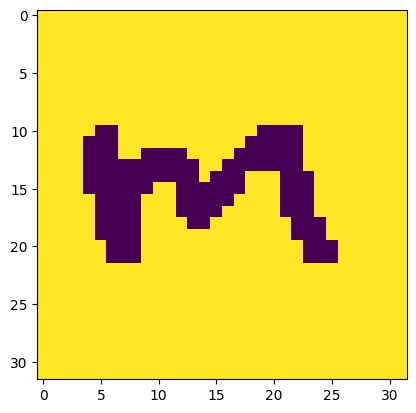

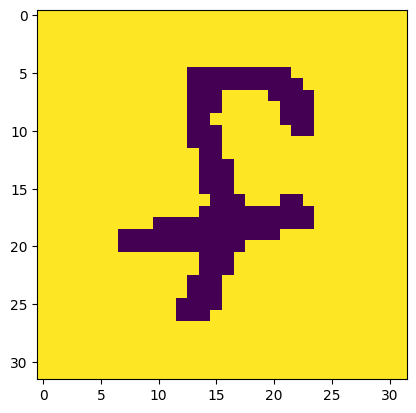

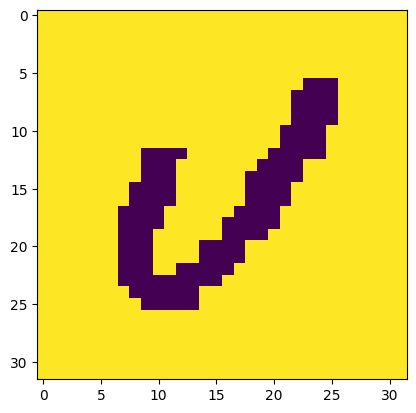

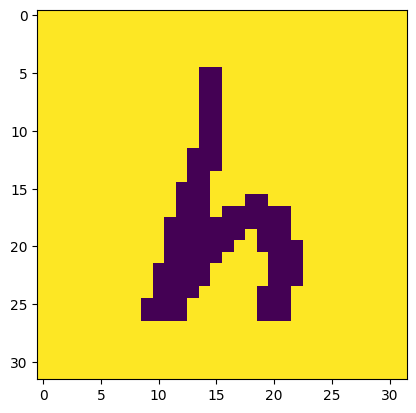

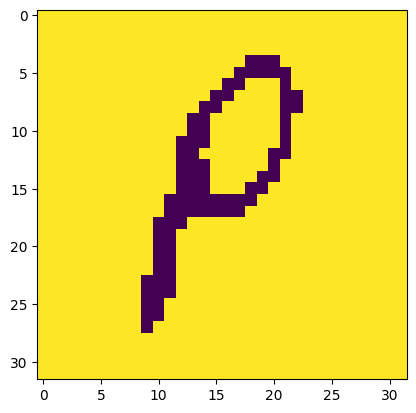

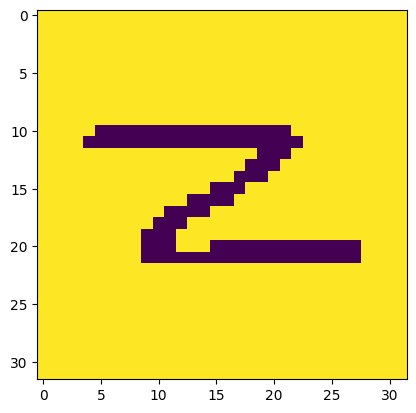

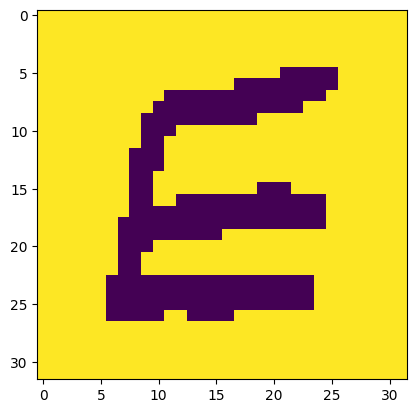

In [41]:
for i in range(37):
    plt.imshow(map_latin[i])
    plt.show()

In [21]:
val_latin, count_latin = np.unique(cluster_latin, return_counts=True)
val_hiragana, count_hiragana = np.unique(cluster_hiragana, return_counts=True)


In [10]:
latin = np.array(np.unique(cluster_latin, return_counts=True)).T
hiragana = np.array(np.unique(cluster_hiragana, return_counts=True)).T


In [15]:
latin_sorted = latin[latin[:,1].argsort()[::-1]]
hiragana_sorted = hiragana[hiragana[:,1].argsort()[::-1]]
